In [1]:
import pandas as pd

data = pd.read_csv('creditcard.csv')

print(data.head())
print(data.info())
print(data.describe())

/var/folders/jx/lf3_k3fd0s5883pdm2d2kg8w0000gn/T/ipykernel_72235/4083001189.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

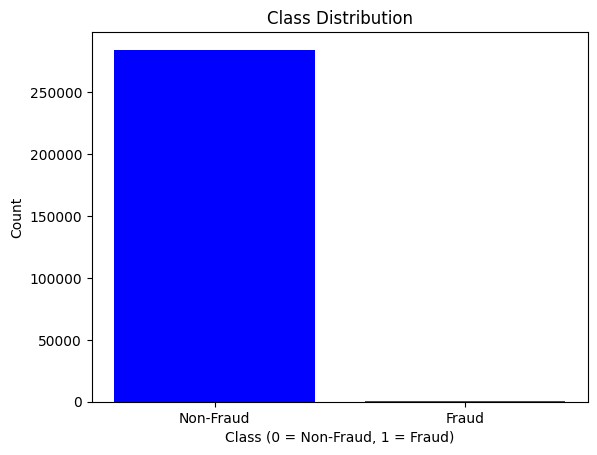

Non-Fraud: 284315, Fraud: 492
Fraud Ratio: 0.00173


In [ ]:
import matplotlib.pyplot as plt

# Calculate and plot class distribution
class_counts = data['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Calculate class imbalance ratio
print(f"Non-Fraud: {class_counts[0]}, Fraud: {class_counts[1]}")
print(f"Fraud Ratio: {class_counts[1] / class_counts[0]:.5f}")

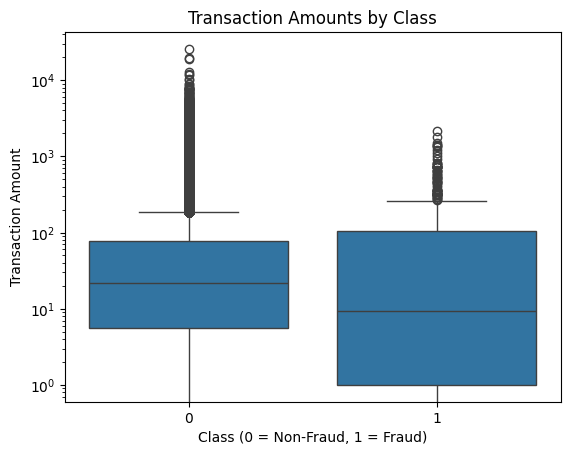

In [ ]:
# Boxplot for transaction amounts by class
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amounts by Class')
plt.yscale('log')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

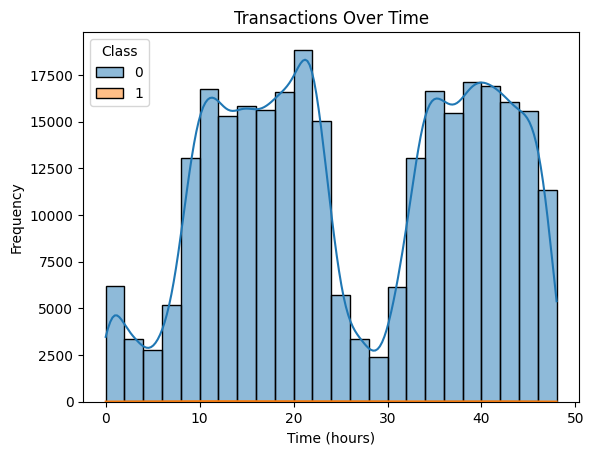

In [ ]:
data['Time (hours)'] = data['Time'] / 3600

# Plot transactions over time
sns.histplot(data, x='Time (hours)', hue='Class', bins=24, kde=True)
plt.title('Transactions Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()

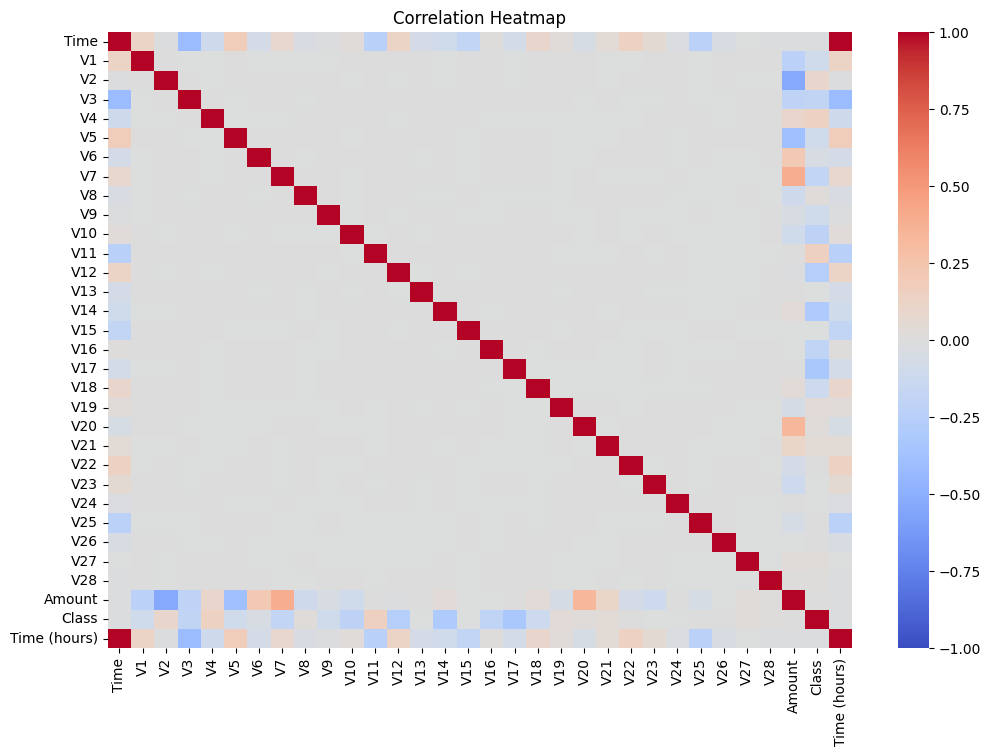

In [14]:
import seaborn as sns

# Correlation matrix and heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, annot=False)
plt.title('Correlation Heatmap')
plt.show()